#컨볼루션 신경망

컨볼루션 신경망 예제 1) 컨볼루션 신경망 구축

Epoch 1/30
329/329 [==============================] - 37s 108ms/step - loss: 0.7221 - acc: 0.7335 - val_loss: 0.4354 - val_acc: 0.8476
Epoch 2/30
329/329 [==============================] - 37s 112ms/step - loss: 0.4408 - acc: 0.8394 - val_loss: 0.3606 - val_acc: 0.8719
Epoch 3/30
329/329 [==============================] - 35s 105ms/step - loss: 0.3838 - acc: 0.8611 - val_loss: 0.3313 - val_acc: 0.8824
Epoch 4/30
329/329 [==============================] - 34s 104ms/step - loss: 0.3531 - acc: 0.8711 - val_loss: 0.3214 - val_acc: 0.8831
Epoch 5/30
329/329 [==============================] - 34s 103ms/step - loss: 0.3312 - acc: 0.8798 - val_loss: 0.3105 - val_acc: 0.8893
Epoch 6/30
329/329 [==============================] - 35s 105ms/step - loss: 0.3139 - acc: 0.8845 - val_loss: 0.2779 - val_acc: 0.9024
Epoch 7/30
329/329 [==============================] - 32s 99ms/step - loss: 0.3018 - acc: 0.8901 - val_loss: 0.2684 - val_acc: 0.9033
Epoch 8/30
329/329 [==============================] - 34

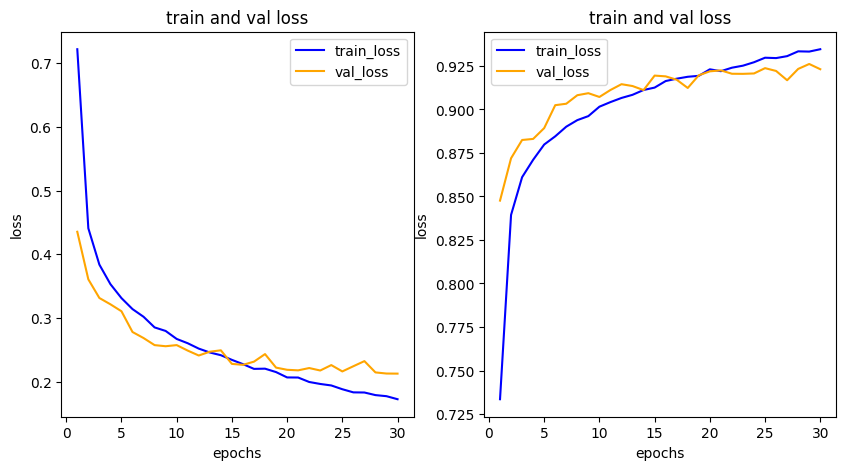


313/313 [==============================] - 4s 12ms/step - loss: 0.2297 - acc: 0.9184

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                 

In [4]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

# 0~1 범위로 만들기, 처리속도 빨라짐
x_train = np.reshape(x_train/255, (-1, 28, 28, 1))
x_test = np.reshape(x_test/255, (-1, 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3,
                                                  random_state = 777)

model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu",
           input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

    Dropout(0.5),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

his_dict = history.history

loss = his_dict["loss"]
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = "blue", label = "train_loss")
ax1.plot(epochs, val_loss, color = "orange", label = "val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict["acc"]
val_acc = his_dict["val_acc"]

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = "blue", label = "train_loss")
ax2.plot(epochs, val_acc, color = "orange", label = "val_loss")
ax2.set_title("train and val loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()

plt.show()
print()

## 모델 평가
model.evaluate(x_test, y_test)
print()

model.summary()